# Data Visualization using Pandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Read csv File

In [4]:
BASE_PATH = '../data'
anime_df = pd.read_csv(f'{BASE_PATH}/merged_anime.csv', index_col='anime_id')
rating_df = pd.read_csv(f'{BASE_PATH}/rating.csv')

## Data Type

In [5]:
anime_df.dtypes

name               object
genre              object
type               object
episodes           object
rating            float64
members             int64
japanese_title     object
aired              object
image_url          object
dtype: object

In [6]:
rating_df.dtypes

user_id     int64
anime_id    int64
rating      int64
dtype: object

## Data Scale

In [7]:
uniq_anime_count = rating_df['anime_id'].nunique()
uniq_user_count = rating_df['user_id'].nunique()

In [8]:
uniq_anime_count

11200

In [9]:
uniq_user_count

73515

In [10]:
rating_df.shape[0]

7813737

## Data Distribution

In [11]:
uniq_ratings = rating_df['rating'].nunique()
uniq_ratings

11

<AxesSubplot:ylabel='Frequency'>

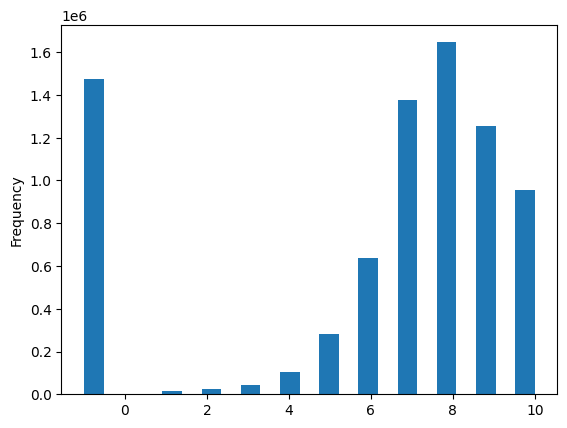

In [13]:
rating_df['rating'].plot.hist(bins=2*uniq_ratings + 1)

In [14]:
rating_df.query('rating > 0')['rating'].describe()

count    6.337241e+06
mean     7.808497e+00
std      1.572496e+00
min      1.000000e+00
25%      7.000000e+00
50%      8.000000e+00
75%      9.000000e+00
max      1.000000e+01
Name: rating, dtype: float64

In [15]:
valid_rating_df = rating_df[rating_df['rating'] > 0]

## Ratings' Count per Anime

In [21]:
rating_groupby = valid_rating_df.groupby(['anime_id']).count()

<AxesSubplot:ylabel='Frequency'>

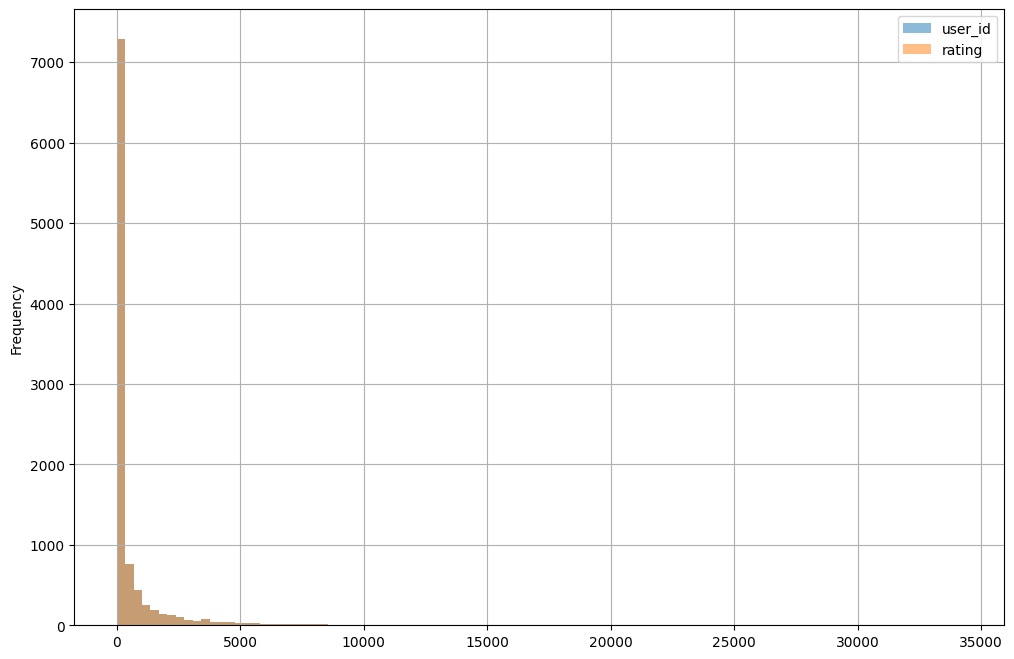

In [23]:
rating_groupby.plot.hist(bins=100, grid=True, figsize=[12, 8], alpha=0.5)

In [24]:
rating_groupby.describe()

,user_id,rating
count,9927.000000,9927.000000
mean,638.384305,638.384305
std,1795.865541,1795.865541
min,1.000000,1.000000
25%,9.000000,9.000000
50%,57.000000,57.000000
75%,395.000000,395.000000
max,34226.000000,34226.000000


## Ratings per User

In [25]:
user_rating_count = valid_rating_df.groupby(['user_id']).count()

<AxesSubplot:ylabel='Frequency'>

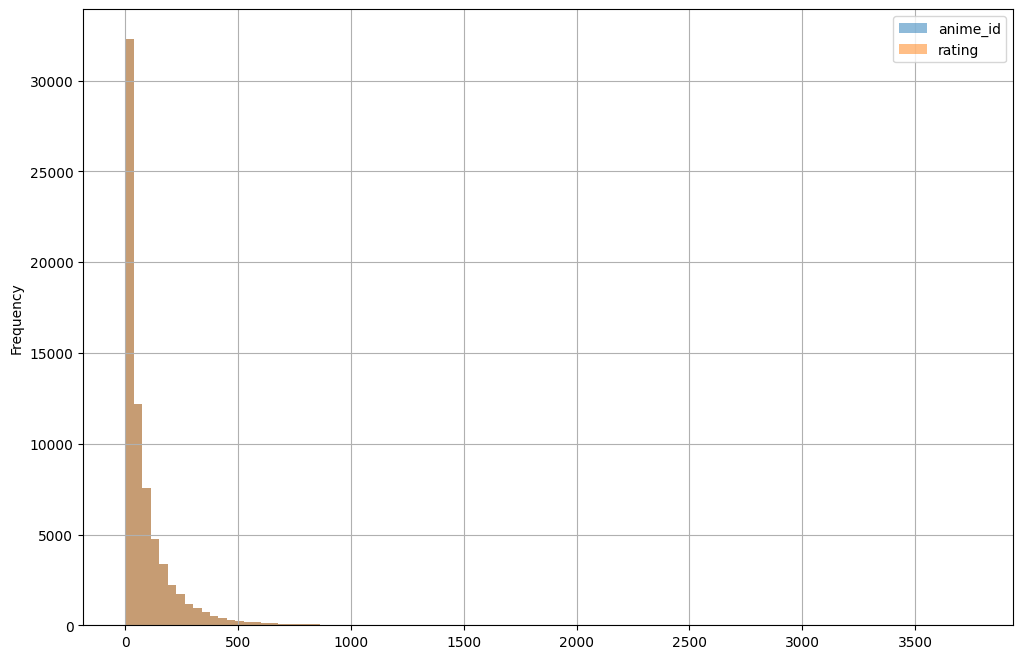

In [26]:
user_rating_count.plot.hist(bins=100, grid=True, figsize=[12, 8], alpha=0.5)

In [28]:
user_rating_count.describe()

,anime_id,rating
count,69600.000000,69600.000000
mean,91.052313,91.052313
std,135.764253,135.764253
min,1.000000,1.000000
25%,13.000000,13.000000
50%,45.000000,45.000000
75%,114.000000,114.000000
max,3747.000000,3747.000000


## Distribution of Anime Genres

In [32]:
genres = {}
for index, row in anime_df.iterrows():
    try:
        anime_genres = [g.strip() for g in row['genre'].split(',')]
        for genre in anime_genres:
            if genre not in genres:
                genres[genre] = 0
            genres[genre] += 1
    except:
        pass

print(genres)

{'Drama': 2016, 'Romance': 1464, 'School': 1220, 'Supernatural': 1037, 'Action': 2845, 'Adventure': 2348, 'Fantasy': 2309, 'Magic': 778, 'Military': 426, 'Shounen': 1712, 'Comedy': 4645, 'Historical': 806, 'Parody': 408, 'Samurai': 148, 'Sci-Fi': 2070, 'Thriller': 87, 'Sports': 543, 'Super Power': 465, 'Space': 381, 'Slice of Life': 1220, 'Mecha': 944, 'Music': 860, 'Mystery': 495, 'Seinen': 547, 'Martial Arts': 265, 'Vampire': 102, 'Shoujo': 603, 'Horror': 369, 'Police': 197, 'Psychological': 229, 'Demons': 294, 'Ecchi': 637, 'Josei': 54, 'Shounen Ai': 65, 'Game': 181, 'Dementia': 240, 'Harem': 317, 'Cars': 72, 'Kids': 1609, 'Shoujo Ai': 55, 'Hentai': 1141, 'Yaoi': 39, 'Yuri': 42}


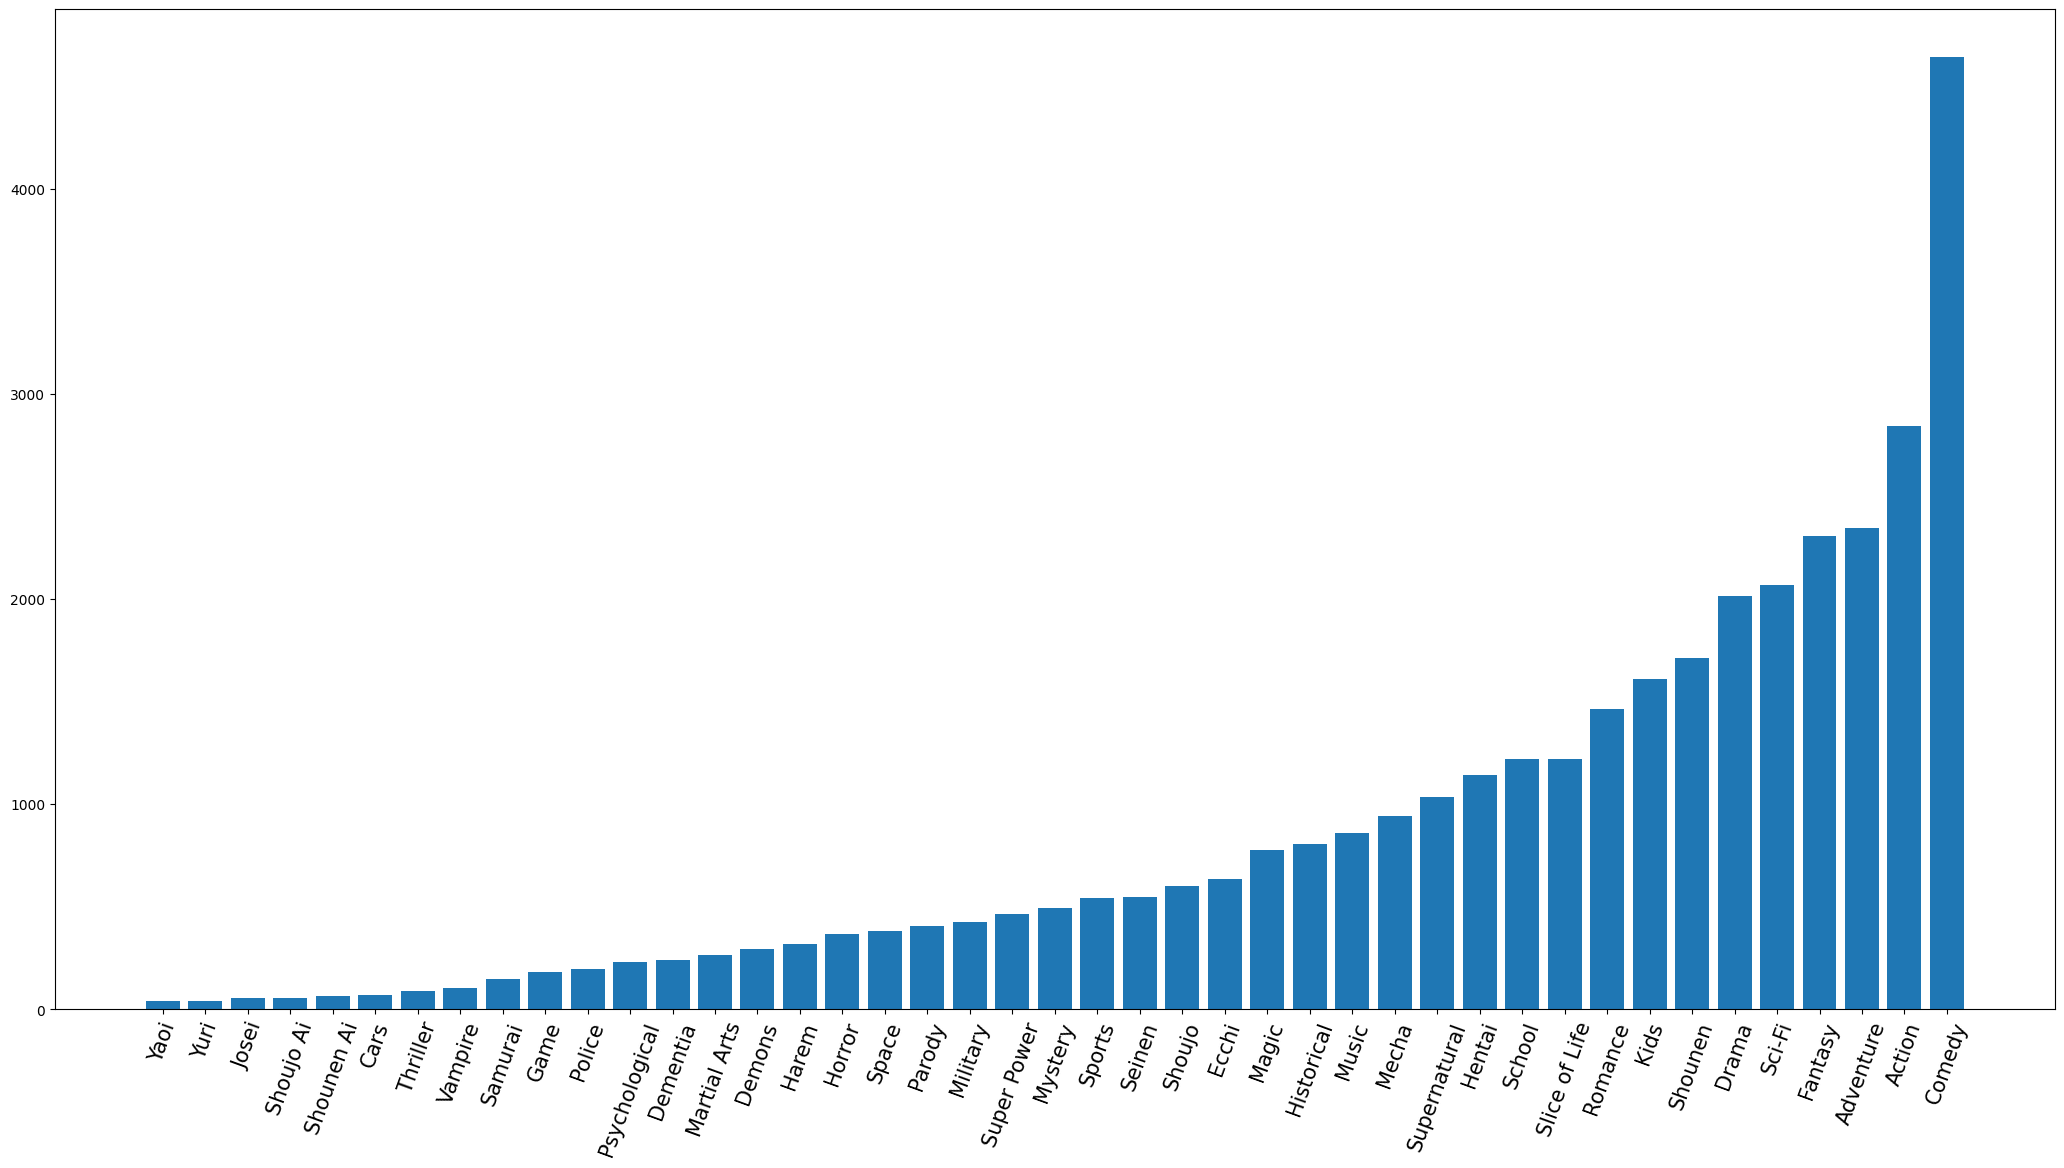

In [33]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_axes([0, 0, 1, 1])
tuples = sorted(genres.items(), key=lambda x: x[1])
labels = [t[0] for t in tuples]
values = [t[1] for t in tuples]
ax.bar(labels, values)

plt.xticks(rotation=70, fontsize=15)
plt.show()

## Animes with High Ratings

In [35]:
anime_df.sort_values(by='rating', ascending=False).head()

,name,genre,type,episodes,rating,members,japanese_title,aired,image_url
anime_id,,,,,,,,,
33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1,10.00,13,鷹の爪8 吉田くんのX(バッテン)ファイル,"Aug 20, 2016",https://cdn.myanimelist.net/images/anime/12/80...
30120,Spoon-hime no Swing Kitchen,"Adventure, Kids",TV,Unknown,9.60,47,スプーンひめのスイングキッチン,"Apr 7, 1997 to Apr 10, 1999",https://cdn.myanimelist.net/images/anime/11/72...
23005,Mogura no Motoro,Slice of Life,Movie,1,9.50,62,もぐらのモトロ,"Jul 19, 1962",https://cdn.myanimelist.net/images/anime/5/814...
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,君の名は。,"Aug 26, 2016",https://cdn.myanimelist.net/images/anime/5/870...
33607,Kahei no Umi,Historical,Movie,1,9.33,44,嘉兵衛の海,"Jul 16, 2005",https://cdn.myanimelist.net/images/anime/7/808...


## The Relationship Between Ratings Counts and Ratings

In [37]:
groupby_df = valid_rating_df.groupby(['anime_id']).agg({
    'rating': ['count', 'mean']
}).droplevel(axis=1, level=0)
groupby_df

,count,mean
anime_id,,
1,13449,8.869433
5,5790,8.439724
6,9385,8.419393
7,2169,7.533426
8,308,7.198052
...,...,...
34324,11,5.909091
34325,15,7.333333
34349,3,7.000000


<AxesSubplot:xlabel='count', ylabel='mean'>

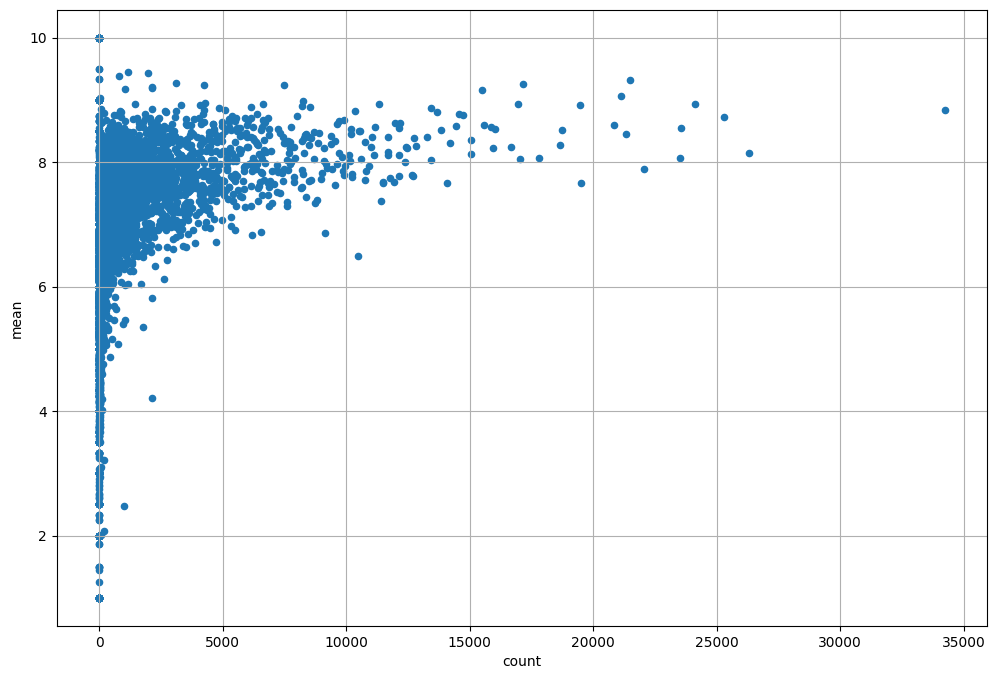

In [38]:
groupby_df.plot.scatter(x='count', y='mean', grid=True, figsize=[12, 8])